In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

%matplotlib inline
housing_csv = '/Users/Marshall2/Downloads/housing.csv'
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(housing_csv, names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"] )

from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
#1. Clean Up Data and Perform Exporatory Data Analysis
# Exploratory data analysis.
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.shape

(506, 14)

In [7]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

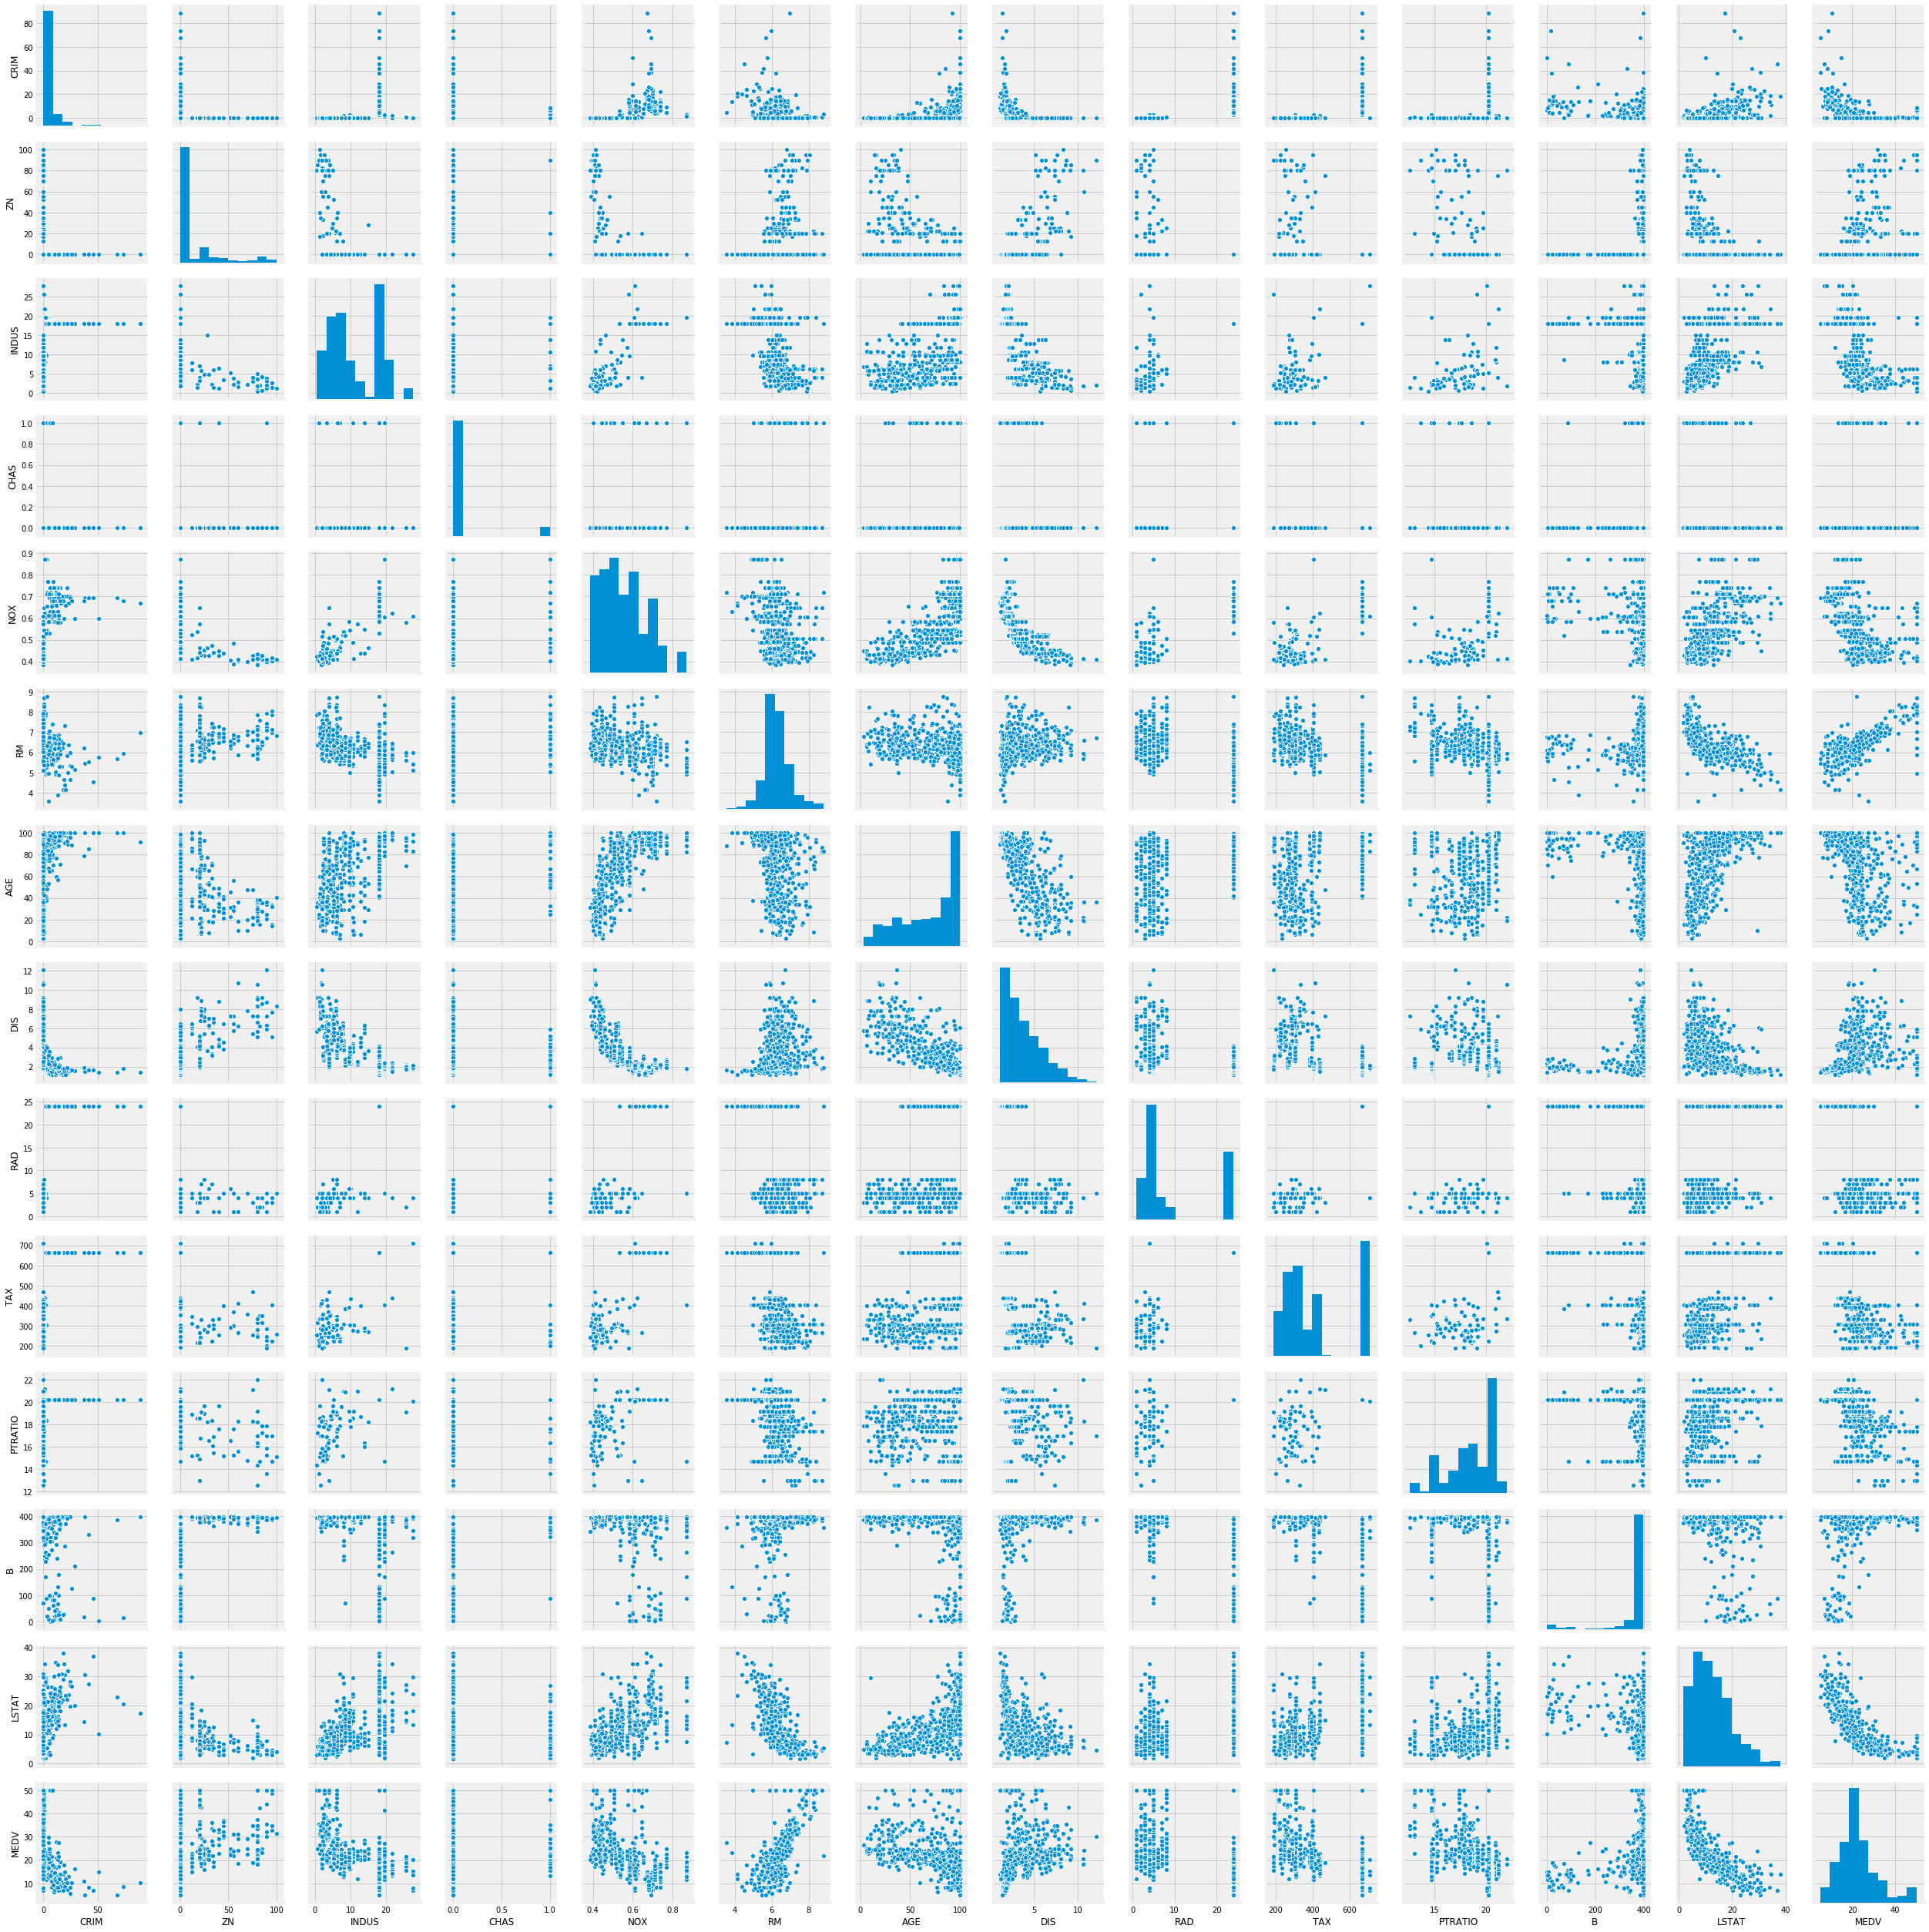

In [9]:
sns.pairplot(df);

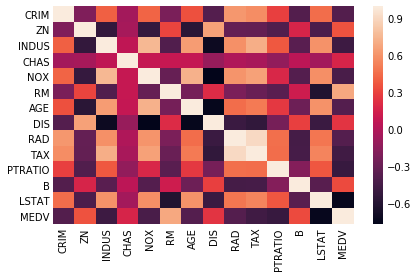

In [10]:
sns.heatmap(df.corr());

In [11]:
#Using scikit-learn Linear Regression
#2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV
#Score and plot your predictions. What do these results tell us?

# Create feature matrix (X)
feature_cols = ['CRIM', 'RM', 'PTRATIO', 'LSTAT']
X = df[feature_cols]
# Create response vector (y)
y = df.MEDV

# Import the class.
from sklearn.linear_model import LinearRegression

# Instantiate the model.
lr = LinearRegression()

# Train the model on the entire data set.
lr.fit(X, y)

# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

# Predict the response values for the observations in X ("test the model").
y_pred = lr.predict(X)

from sklearn import metrics

print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

16.92329819193078
[-0.06543822  4.61862374 -0.88968936 -0.53431323]
MSE: 26.888274640738857
RMSE: 5.185390500313246


In [12]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, lr.coef_))

[('CRIM', -0.06543821883174486),
 ('RM', 4.618623743429799),
 ('PTRATIO', -0.8896893606493247),
 ('LSTAT', -0.534313225792202)]

C:\Users\Marshall2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


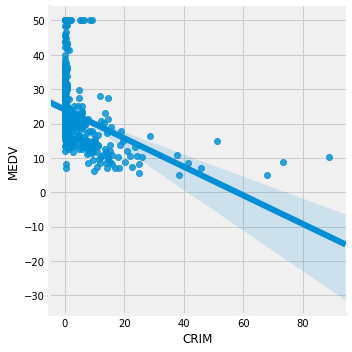

In [13]:
#scatter with regression line for Crime Rate
sns.lmplot(x='CRIM', y='MEDV', data=df);

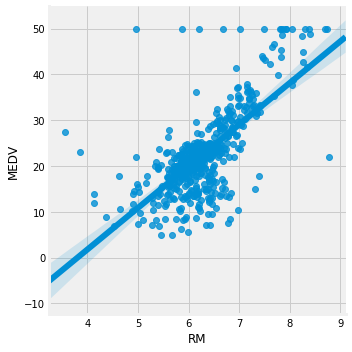

In [14]:
#scatter with regression line for total rooms per dwelling
sns.lmplot(x='RM', y='MEDV', data=df);

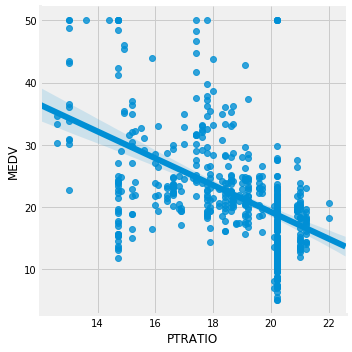

In [15]:
#scatter with regression line for Pupil-Teacher Ratio
sns.lmplot(x='PTRATIO', y='MEDV', data=df);

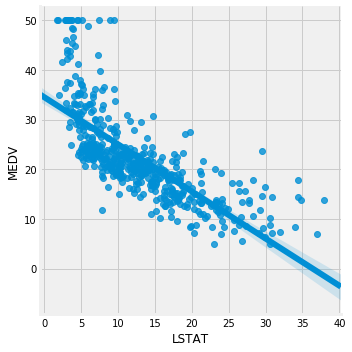

In [16]:
#scatter with regression line for % lower income status per population
sns.lmplot(x='LSTAT', y='MEDV', data=df);

In [17]:
#the results of tell us that the increase in Rooms per home increase the Median Value of homes
#it also tells us that the increase in Crime rate, Pupil Teacher ratio, and % lower income population decrease the Median Value of homes

In [18]:
#3. Try 70/30 and 90/10 train/test splits 
#(70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
#Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)


lr2 = LinearRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

C:\Users\Marshall2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.7276918878198696

In [19]:
y_pred2 = lr.predict(X_test)

In [20]:
print(metrics.mean_squared_error(y_test, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

22.729236611380383
4.767518915681445


C:\Users\Marshall2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


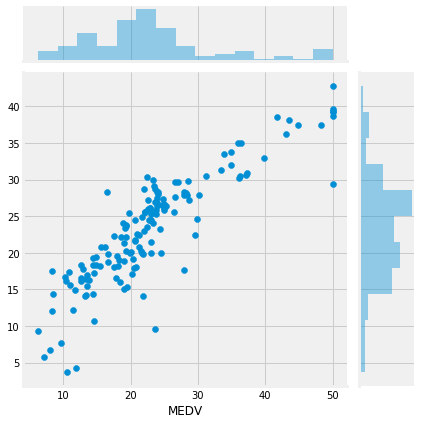

In [21]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

lr3 = LinearRegression()
lr3.fit(X_train, y_train)
lr3.score(X_test, y_test)

C:\Users\Marshall2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.7440673687721538

In [23]:
y_pred3 = lr3.predict(X_test)

C:\Users\Marshall2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


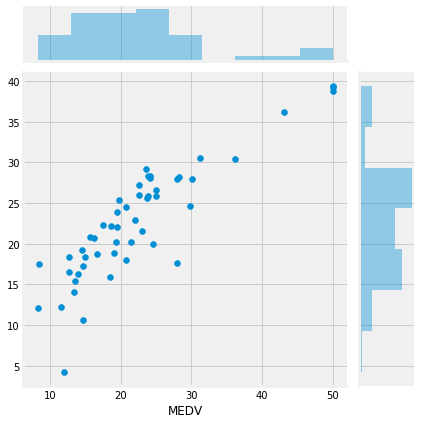

In [24]:
yhat2 = lr.predict(X_test)
sns.jointplot(y_test, yhat2);

In [25]:
#this tells us that the training set of 70% training data has a lower MSE and RMSE. Meaning that set of data had fewer outliers scewing the data
#this tells us that when using a higher % of training data that there will be an increase in the error scale

In [26]:
#4. Use k-fold cross validation varying the number of folds from 5 to 10
#What seems optimal? How do your scores change? What is the variance like? 
#Try different folds to get a sense of how this impacts your score. 
#What are the tradeoffs associated with choosing the number of folds?

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

------------------------------------

K: 5
Cross-validated scores: [0.72325111 0.72039411 0.55158271 0.17413054 0.01866211]
Mean CV R2: 0.437604114854839
Std CV R2: 0.28965021341680486
Cross-Predicted R2: 0.5991102119132667
------------------------------------

K: 6
Cross-validated scores: [ 0.70814721  0.71544377  0.54043518  0.7130705  -0.39871822  0.17054326]
Mean CV R2: 0.4081536153811685
Std CV R2: 0.4087372733355963
Cross-Predicted R2: 0.502874674857744
------------------------------------

K: 7
Cross-validated scores: [ 0.73090556  0.67217574  0.59797121  0.60726263  0.27576372 -0.57956091
  0.32578686]
Mean CV R2: 0.3757578312931475
Std CV R2: 0.4212390821277811
Cross-Predicted R2: 0.4885168709765393
------------------------------------

K: 8
Cross-validated scores: [ 0.75866903  0.62174229  0.69758212  0.62926039  0.70079344 -0.27349204
 -1.588243    0.31502359]
Mean CV R2: 0.2326669770435427
Std CV R2: 0.758231930406496
Cross-Predicted R2: 0.5948550833496504
-----------------

In [27]:
#the optimal number appears to be 7. The scores change with the increase in folds, the higher the fold the lower the bias
#however the tradeoff becomes the higher the folds get the higher the vairance also becomes

In [28]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [29]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [32]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


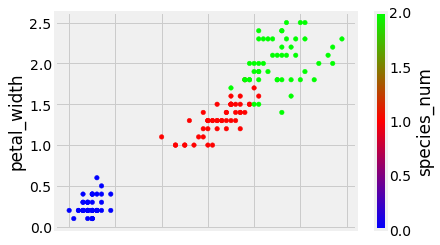

In [33]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

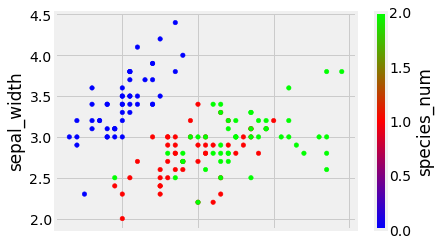

In [34]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

In [35]:
#KNN Classification of the Iris Dataset
#Create your feature matrix "X"
#This will be all species measurements (sepal length, petal width, etc...)
iris_feat = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
X = iris[iris_feat]

In [36]:
#Create your target vector "y"
#This will be the species type
y = iris.species_num

In [37]:
#Make Use of Train-Test-Split
#Split your data in to train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [38]:
#Import KNN From scikit-learn and Instatiate a Model With One Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
#Check the Accuracy
#Train your model using the training set then use the test set to determine the accuracy
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


In [40]:
#Create a Model With Five Neighbors. Did it Improve?
#no it stayed the same
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473
